# Final Assessment for M505(Intro A.I and Machine Learing) Group B

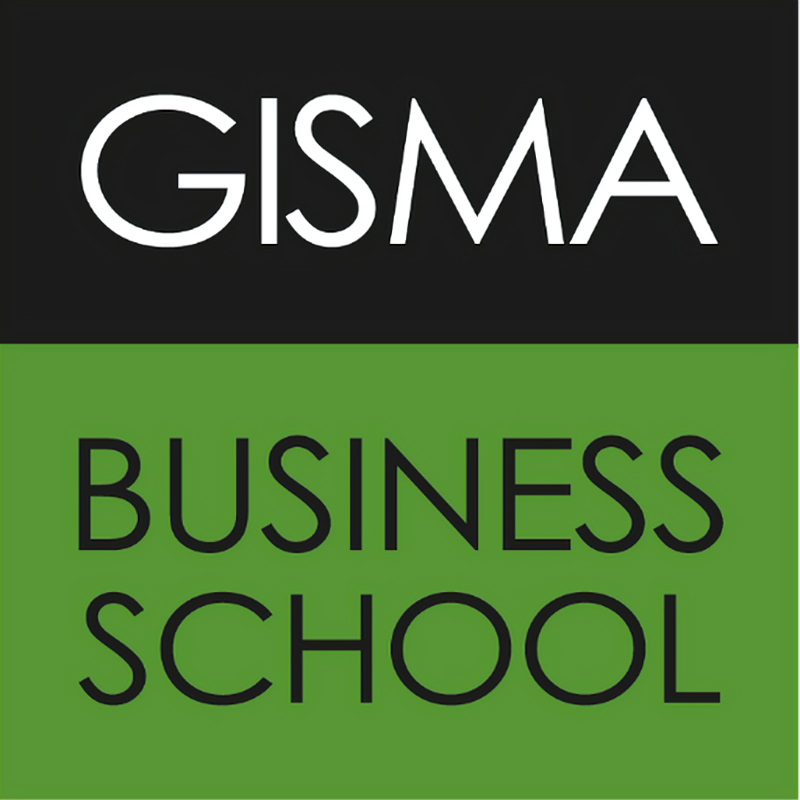

In [1]:
from IPython.display import Image
Image("GISMA_LOGO.png",width = 200, height = 200)

### IBM Human Resource Analytics Employees Attrition Data Set (Predictions on the basis of past data)

# 1) Introduction

Attrition in the industry is getting critical these days specially after pandemic, most of the Industries had to cut down there staff in half, back in the days due to covid, and the impact of that lasted long and still getting critical as now the employees are more leaning towards leaving the company if anything bad happens or they don't get what they thougth before joining the company in other words we can say that loyality of the employees is getting hard to achive and due to that integrity of the company is oh high risk.“Attrition is said to be the gradual reduction in the numberof employees through retirement, resignation or death. It can also be said as Employee Turnover or Employee Defection”.A thoroughly prepared and
welladapted worker leaves the association, it makes a vacuum. Along these lines, the association loses key
abilities, information and business connections.Present day managers are incredibly keen on decreasing Attrition rate in the association, so that it will add to the greatest adequacy,development, and progress of the organization.
Subsequently, we want a strategies, calculations to forecast of representative wearing down utilizing different
data mining procedures.

# 2) Problem Statement
My Clients organization is worried about elevated degree of Attrition rate and because of which their trustworthiness can be on the high gamble, They have employed me as a Data Scientist to sort out what are the realities that influences the whittling down rate and to carry the experiences of information to the company directors so they can attempt to settle on choice which can help their company.The Dataset we will utilize is given by IBM on Kaggle(www.kaggle.com).

In the event that we examine about the kind of Data we have, it depends on mathematical and categorical data, we have 1500 entries roughly. We have 35 unique columns and 1470 rows.This data is delevelope by IBM itself by doing survey. We will be chipping away at this dataset to figure out the bits of knowledge we will attempt Multiple Data Science techinques to find out and predict causes of attrition in future so that company can counter this hurdles in coming future.



# 3) Methodology and Approach

Employee attrition is the internal data of the company, which is difficult to obtain, and some data has a certain degree of confidentiality, therefore our paper used the data set disclosed by kaggle. The sample size of the data set is 1471, there are 34 feature variables, mainly divided into three types of variables: personal basic information, work experience, attendance rate. This paper explored the relationship between employee’s characteristics and employee attrition, found Whether characteristics have a great inuence on employee attrition. In addition, we used machine learning algorithms to select important features that inuenced the employee attrition, and predicted the it. In this paper, we exploited three ma-chine learning algorithms: Decision Tree, and Logistic Regression and k-means clustering.

This Attrition dataset is the internal data of the organization, which is hard to get, and a few data has a specific level of secrecy, in this manner my Machine Learning pipeline will utilized the dataset provided by IBM on kaggle. The sample size of this given dataset is  1471, there are 35 columns in total which are unique, Mainly divided into two kinds , one is categorical data which we will convert into Numerical data using "OneHotEncoder" and other is numerical one.We we build a ML pipeline in a manner that first we will visualize data and explore the data in depth that what kind of data we have(I.e it's datatype , missing or duplicate value etc.), then we will look for corelations in the data, later on we will do some feature engineering ad filter out the important and relevent features and then we will apply some machine learning models and compare them that which one will work the best.

# 4) Importing Libraries 

In [2]:
# To Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


import hvplot

import missingno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 5) Data Exploration


### 5.1) Reading the data set using pandas csv read function

In [3]:
HR_Emp_df = pd.read_csv("data/HR_Employee_data.csv")
HR_Emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 5.2) Checking the dataset for null values and data types

In [49]:
HR_Emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

### 5.3) Looking for null values in each columns

In [5]:
HR_Emp_df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

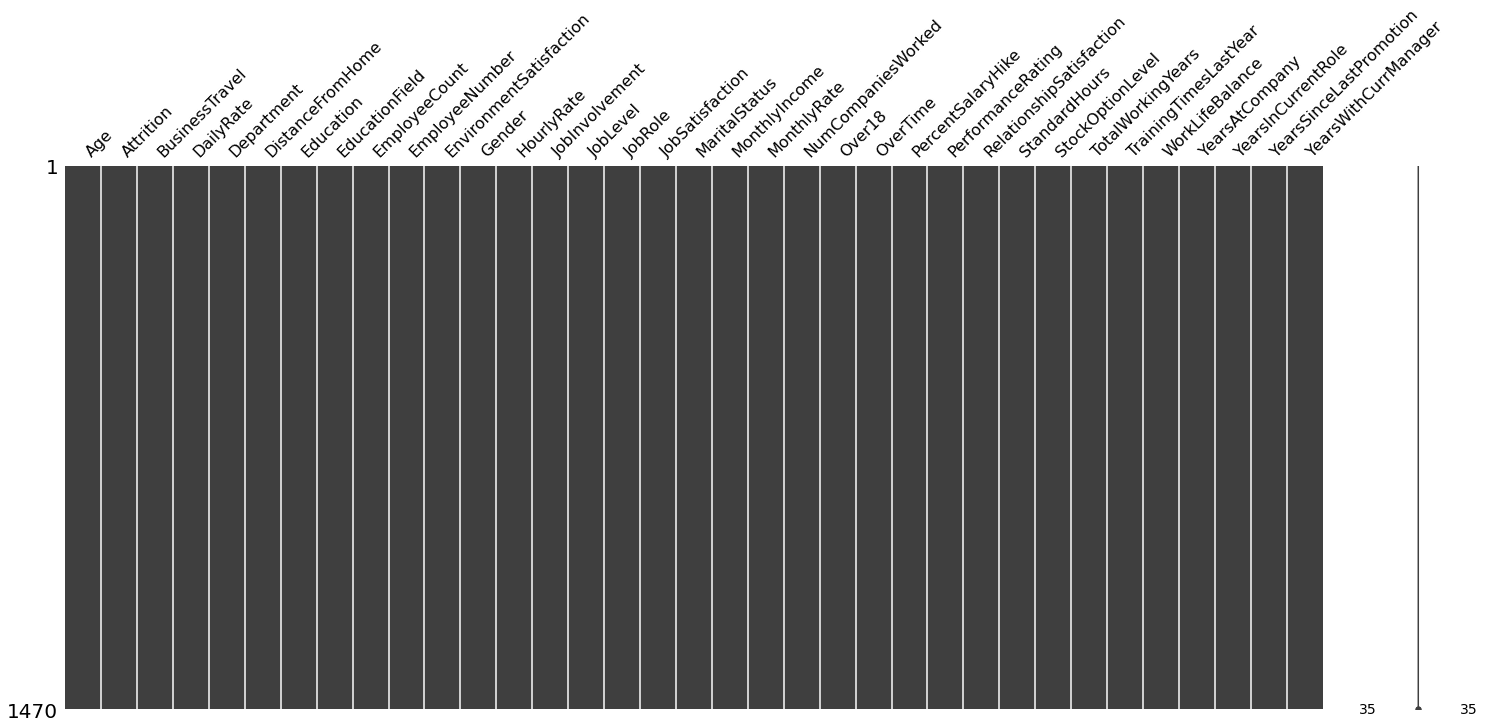

In [8]:
missingno.matrix(HR_Emp_df)

In [9]:
HR_Emp_df[HR_Emp_df.duplicated(keep='first')].shape

(0, 35)

In [10]:
HR_Emp_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
for column in HR_Emp_df.columns:
    print(f"{column}:Unique values in each column No = {HR_Emp_df[column].nunique()}")


Age:Unique values in each column No = 43
Attrition:Unique values in each column No = 2
BusinessTravel:Unique values in each column No = 3
DailyRate:Unique values in each column No = 886
Department:Unique values in each column No = 3
DistanceFromHome:Unique values in each column No = 29
Education:Unique values in each column No = 5
EducationField:Unique values in each column No = 6
EmployeeCount:Unique values in each column No = 1
EmployeeNumber:Unique values in each column No = 1470
EnvironmentSatisfaction:Unique values in each column No = 4
Gender:Unique values in each column No = 2
HourlyRate:Unique values in each column No = 71
JobInvolvement:Unique values in each column No = 4
JobLevel:Unique values in each column No = 5
JobRole:Unique values in each column No = 9
JobSatisfaction:Unique values in each column No = 4
MaritalStatus:Unique values in each column No = 3
MonthlyIncome:Unique values in each column No = 1349
MonthlyRate:Unique values in each column No = 1427
NumCompaniesWor

In [12]:
HR_Emp_df['Attrition'] = HR_Emp_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
HR_Emp_df['OverTime'] = HR_Emp_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
HR_Emp_df['Over18'] = HR_Emp_df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

 ### Why we are doing this,
  - So here we are converting "Attrition" column into boolean which means that actually the "Attrition" column contain "Yes" for those employees who quit and "No" for those who stayed at the company, we have used lambda funtion to keep the code concise and converted yes and no into "1" and "0"
  - Same we have done for the "overtime" column 
  - The same methodology is applied for "Over18" column

In [13]:
HR_Emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


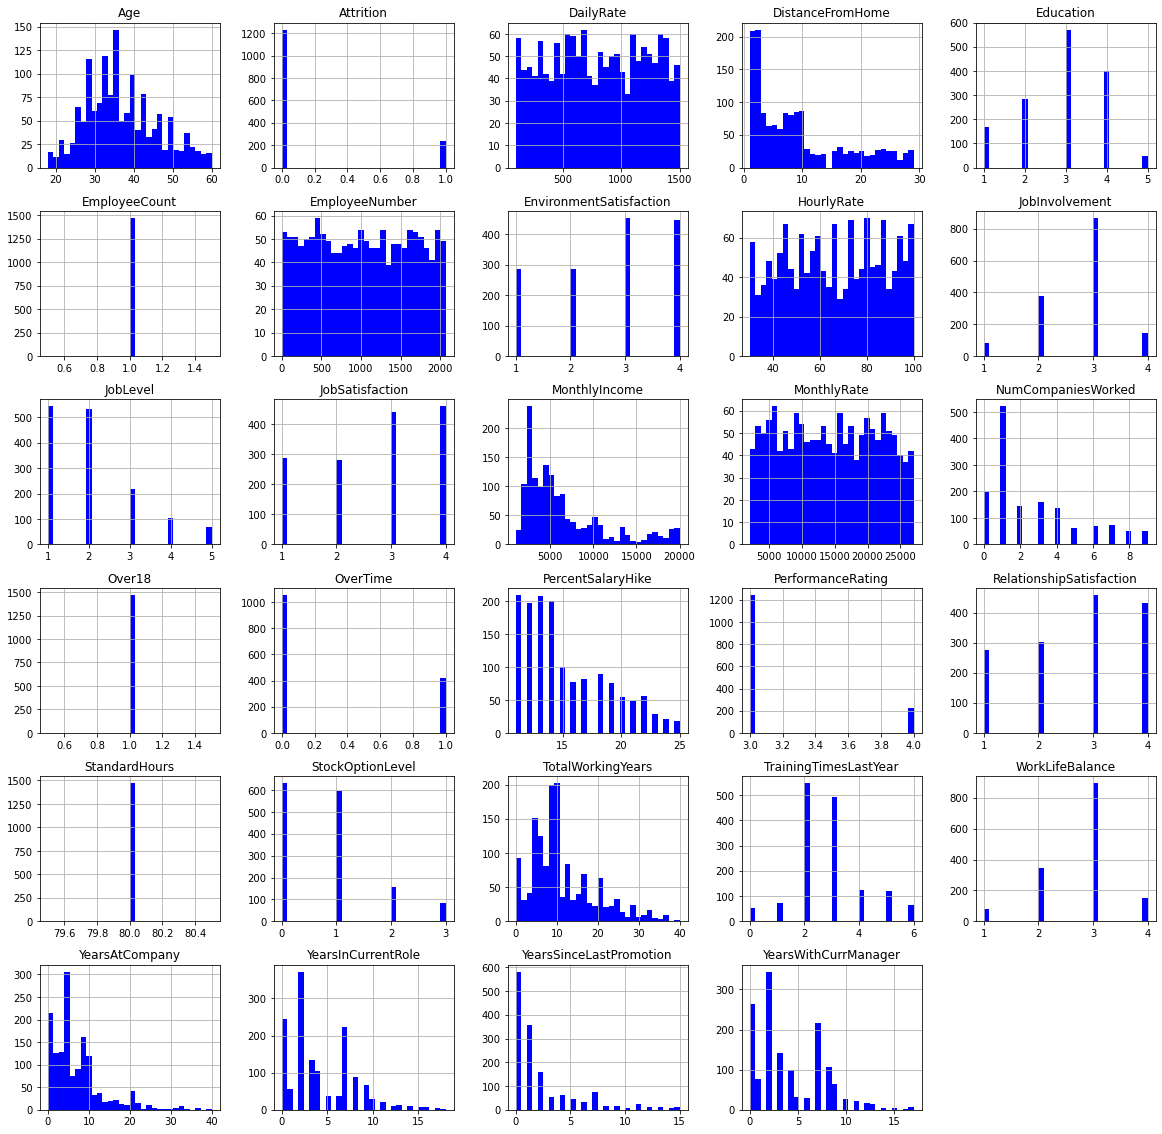

In [14]:
# Plotting a histogram to visualize how each feature is distributed into dataset

HR_Emp_df.hist(bins = 30, figsize = (20,20), color = 'blue');


# What we have Analyze so far

  -  The most number of employees we have are lies between 27 to 40 age group.
  -  Most of them lives near to the work place.
  -  Most of our employees have level 3 of education.
  -  Most of the employees worked less than 3 years in company.


So as we know some of the data columns are not quite useful for us i.e "EmployeeCount" , "Standardhours", "Over18" because it   will be the same from one employee to another and if we talk about "Over18" so it's definitley be "Yes" for all because all of the Employee will be over 18, Moreover we do not even need the "EmployeeNumber" so lets get rid of them.



# Dropping the Columns we don't need

In [15]:
HR_Emp_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [16]:
HR_Emp_df.head()
# Now we have 31 columns

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# Preparing Dataset

- Before feeding our data into a Machine learning model first thing that needed to be done is data preparation.Which consist of encoding all the categorical features (either LabelEncoding or the OneHotEncoding) as the model expects the features to be in numerical form and for better performance, well we are going to use OnehotEncoding later on we will do the feature scaling ie bringing all the features onto the same scale by using the MinMaxScaler provided in the scikit library

In this section we will ensure that data is usable and error free and if there is any embiguity init we will resolve it by data cleansing technique.


In [17]:
# Checking the datatype of all the features
HR_Emp_df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

# Data Separation 

In [18]:


# Converting the categorical data into numerical data after sperating it 
cat_df = HR_Emp_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
cat_df



,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


# Feature Encoding

- Here we are using OnehotEncoder to convert the categorical data into numerical 
- OnehotEncoder will generate array which we will convert into dataframe again

In [19]:
# Using OneHotEncoder we are going to convert categorical data into numerical data
from sklearn.preprocessing import OneHotEncoder

Enc = OneHotEncoder()
cat_df = Enc.fit_transform(cat_df).toarray()
cat_df.shape

(1470, 26)

In [20]:


# Now we are converting the encoded features into dataframe
cat_df = pd.DataFrame(cat_df)
cat_df 



,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [21]:
# Separating the numerical data
numerical_df = HR_Emp_df[['Age', 'DailyRate', 'DistanceFromHome','Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears'	,'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]
numerical_df

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


### Concatenating the both Categorical data and Numerical data 

In [22]:
# Concatenating the categorical dataset X_cat and the numerical dataset X_numerical into a unique dataset

Combine_all_df = pd.concat([cat_df, numerical_df], axis = 1)
Combine_all_df


,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


# Feature Scaling
Lets use sklearn's MinMaxScaler to transform the data by scaling each resource to an interval between 0 and 1 to ensure that our machine learning model handles the features equally

In [23]:
from sklearn.preprocessing import MinMaxScaler
MinMaxscal = MinMaxScaler()
Tx = MinMaxscal.fit_transform(Combine_all_df)
Tx



array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [24]:
# Now here we are specifically separating the target feature we want to predict
Ty = HR_Emp_df['Attrition']
Ty

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64


# Creating Testing and Training datasets

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Tx, Ty, test_size =0.20 ,random_state=200)
X_train.shape

(1176, 50)

In [26]:
X_test.shape


(294, 50)


# Building, training and evaluating different Machine Learning models

We are going to use classification algorithms to predict and find out which is more accurate after comparing them

###  Logistic Regression Classifier



In [27]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

mod = LogisticRegression()



In [28]:
# Training the data with logistic regression

mod.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Making predictions and visualizing the accuracy
LRC_prediction = mod.predict(X_test)

print("Accuracy: {}%".format( 100 * accuracy_score(LRC_prediction, y_test)))

Accuracy: 88.43537414965986%


### Prediction based on Logistic Regression

In [30]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")



===============TRAIN=================
Staying Rate: 83.33%
Leaving Rate: 16.67%
===============TEST=================
Staying Rate: 86.05%
Leaving Rate: 13.95%


In [31]:


# Comparing the results using Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report



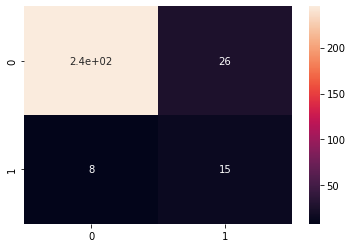

In [32]:


# Testing Set Performance

con_max = confusion_matrix(LRC_prediction, y_test)
sns.heatmap(con_max, annot=True);



The model was able to correctly classify around 3,000 registers and erroneously classify a very small number of employees

In [33]:

# Analyzing the KPI (Key Performance Indicator)

print(classification_report(y_test, LRC_prediction))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       253
           1       0.65      0.37      0.47        41

    accuracy                           0.88       294
   macro avg       0.78      0.67      0.70       294
weighted avg       0.87      0.88      0.87       294



# Random Forest Classifier

It is also widely used in classification problems and like its name implies, consists of a large number of individual decision trees that operate as an ensemble.

In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [35]:

# Training the data

model.fit(X_train, y_train)

RandomForestClassifier()

In [36]:


# Making predictions and visualizing the accuracy

RFC_pred = model.predict(X_test)
print("Accuracy: {}%".format( 100 * accuracy_score(RFC_pred, y_test)))


Accuracy: 88.09523809523809%


<AxesSubplot:>

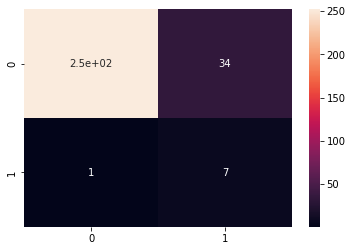

In [37]:
# Testing Set Performance

cm = confusion_matrix(RFC_pred, y_test)
sns.heatmap(cm, annot=True)


In [38]:
# Analyzing the KPI (Key Performance Indicator)

print(classification_report(y_test, RFC_pred))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94       253
           1       0.88      0.17      0.29        41

    accuracy                           0.88       294
   macro avg       0.88      0.58      0.61       294
weighted avg       0.88      0.88      0.84       294



# K-Nearest Neighbors Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
model = KNeighborsClassifier()

In [41]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
KNNC_pred = model.predict(X_test)
print("Accuracy: {}%".format( 100 * accuracy_score(KNNC_pred, y_test)))

Accuracy: 86.39455782312925%


<AxesSubplot:>

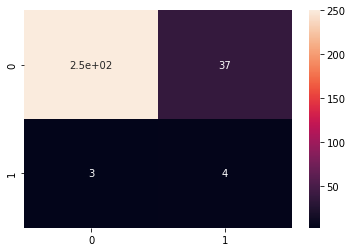

In [43]:
# Testing Set Performance

cm = confusion_matrix(KNNC_pred, y_test)
sns.heatmap(cm, annot=True)

In [44]:


# Analyzing the KPI (Key Performance Indicator)

print(classification_report(y_test, KNNC_pred))


              precision    recall  f1-score   support

           0       0.87      0.99      0.93       253
           1       0.57      0.10      0.17        41

    accuracy                           0.86       294
   macro avg       0.72      0.54      0.55       294
weighted avg       0.83      0.86      0.82       294



# Support Vector Machine

Accuracy of best SVM classfier = 88.44
Best found hyperparameters of SVM classifier = {'C': 1, 'kernel': 'linear'}


<AxesSubplot:>

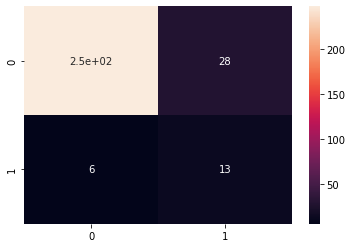

In [45]:
#Import svm model
from sklearn import svm
import sklearn.model_selection

# #Create a svm Classifier
# clf = svm.SVC(kernel='linear') # Linear Kernel


# #Train the model using the training sets
# clf.fit(X_train, y_train)

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)

parameters_grid = {
    "kernel": ["linear", "rbf", "poly"], 
    "C": [0.001, 0.01, 0.1, 1, 10, 100]
}
clf = sklearn.model_selection.GridSearchCV(sklearn.svm.SVC(), 
                                               parameters_grid, scoring="accuracy", cv=5, n_jobs=-1)
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# model_2.fit(X_train, y_train)
print("Accuracy of best SVM classfier = {:.2f}".format(100 *accuracy_score(y_pred, y_test)))

print("Best found hyperparameters of SVM classifier = {}".format(clf.best_params_))

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)


In [46]:
# Analyzing the KPI (Key Performance Indicator)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       253
           1       0.68      0.32      0.43        41

    accuracy                           0.88       294
   macro avg       0.79      0.65      0.68       294
weighted avg       0.87      0.88      0.87       294



In [47]:
# Showing the results

print("Logistic Regression Classifier: {:.2f}% Accuracy".format( 100 * accuracy_score(LRC_prediction, y_test)))
print("Random Forest Classifier: {:.2f}% Accuracy".format( 100 * accuracy_score(RFC_pred, y_test)))
print("K-Nearest Neighbors Classifier: {:.2f}% Accuracy".format( 100 * accuracy_score(KNNC_pred, y_test)))
print("Support Vector Machine: {:.2f}% Accuracy".format( 100 * accuracy_score(y_pred, y_test)))



Logistic Regression Classifier: 88.44% Accuracy
Random Forest Classifier: 88.10% Accuracy
K-Nearest Neighbors Classifier: 86.39% Accuracy
Support Vector Machine: 88.44% Accuracy


In [54]:
from sklearn.metrics import f1_score, classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
Model = []
Accuracy = []
F1Score = []

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
nb_pred1 = nb.predict(X_train)


print("Train score: {}%".format( 100 * accuracy_score(y_train, nb_pred1)))
print()
print("f1 score {}%".format( 100 * f1_score(y_test, nb_pred, average=None)))
print()
print("accuracy score {}%".format( 100 * accuracy_score(y_test, nb_pred)))
print()
print("roc auc score {}%".format( 100 *roc_auc_score(y_test,nb_pred)))

Train score: 71.5986394557823%

f1 score [79.9086758  41.33333333]%

accuracy score 70.06802721088435%

roc auc score 72.38985828593465%


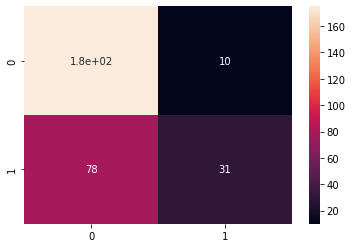

In [55]:

# Testing Set Performance

con_max = confusion_matrix(nb_pred, y_test)
sns.heatmap(con_max, annot=True);

In [56]:
# Analyzing the KPI (Key Performance Indicator)

print(classification_report(y_test, nb_pred))


              precision    recall  f1-score   support

           0       0.95      0.69      0.80       253
           1       0.28      0.76      0.41        41

    accuracy                           0.70       294
   macro avg       0.62      0.72      0.61       294
weighted avg       0.85      0.70      0.75       294



In [58]:
from sklearn.tree import DecisionTreeClassifier

# with gini

gm = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=3, min_samples_leaf=5)
gm.fit(X_train, y_train)
gm_pred = gm.predict(X_test)
gm_pred1= gm.predict(y_train)
print("Train score: {}%".format( 100 * accuracy_score(y_train, gm_pred1)))
print()
print("f1 score {}%".format( 100 * f1_score(y_test, gm_pred, average=None)))
print()
print("accuracy score {}%".format( 100 * accuracy_score(y_test, gm_pred)))
print()
print("roc auc score {}%".format( 100 *roc_auc_score(y_test,gm_pred)))



ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 1. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.